In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt 

#estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression     

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
df = rawData

In [3]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
rawData.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df['Payment_Amount'] = df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6
df['Bill_Amount'] = df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6
df['Past_Payment'] = df.PAY_0 + df.PAY_2 + df.PAY_3 + df.PAY_4 + df.PAY_5 + rawData.PAY_6 

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Bill_Amount,Past_Payment,Payment_Amount
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,7704,-2,689
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,17077,3,5000
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,101653,0,11018
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,231334,0,8388
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,109339,-2,59049


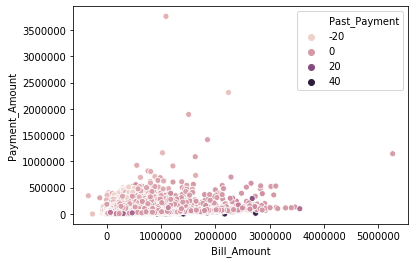

In [12]:
ax = sns.scatterplot(x=df.Bill_Amount,y=df.Payment_Amount,hue=df.Past_Payment);

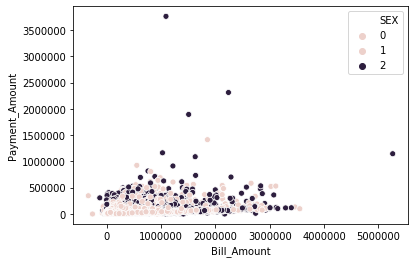

In [13]:
ax = sns.scatterplot(x=df.Bill_Amount,y=df.Payment_Amount,hue=df.SEX);

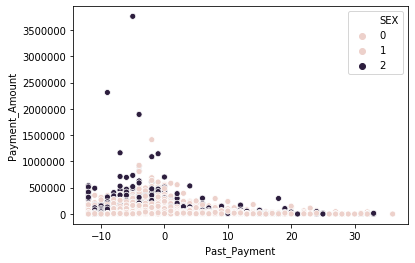

In [14]:
ax = sns.scatterplot(x=df.Past_Payment,y=df.Payment_Amount,hue=df.SEX);

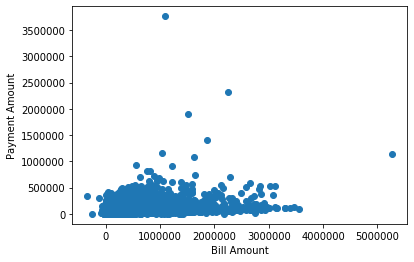

In [15]:
x = df['Bill_Amount']
y = df['Payment_Amount']
plt.xlabel("Bill Amount")
plt.ylabel("Payment Amount")
plt.scatter(x,y)
plt.show( )

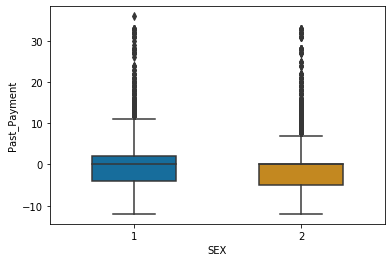

In [16]:
sns.boxplot(y="Past_Payment",x="SEX",data=df,width=0.5,palette="colorblind") 

In [19]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
df = rawData
#Correlation Matrix
corrMat = rawData.corr() 
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [20]:
#Coveriance 
covMat = rawData.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

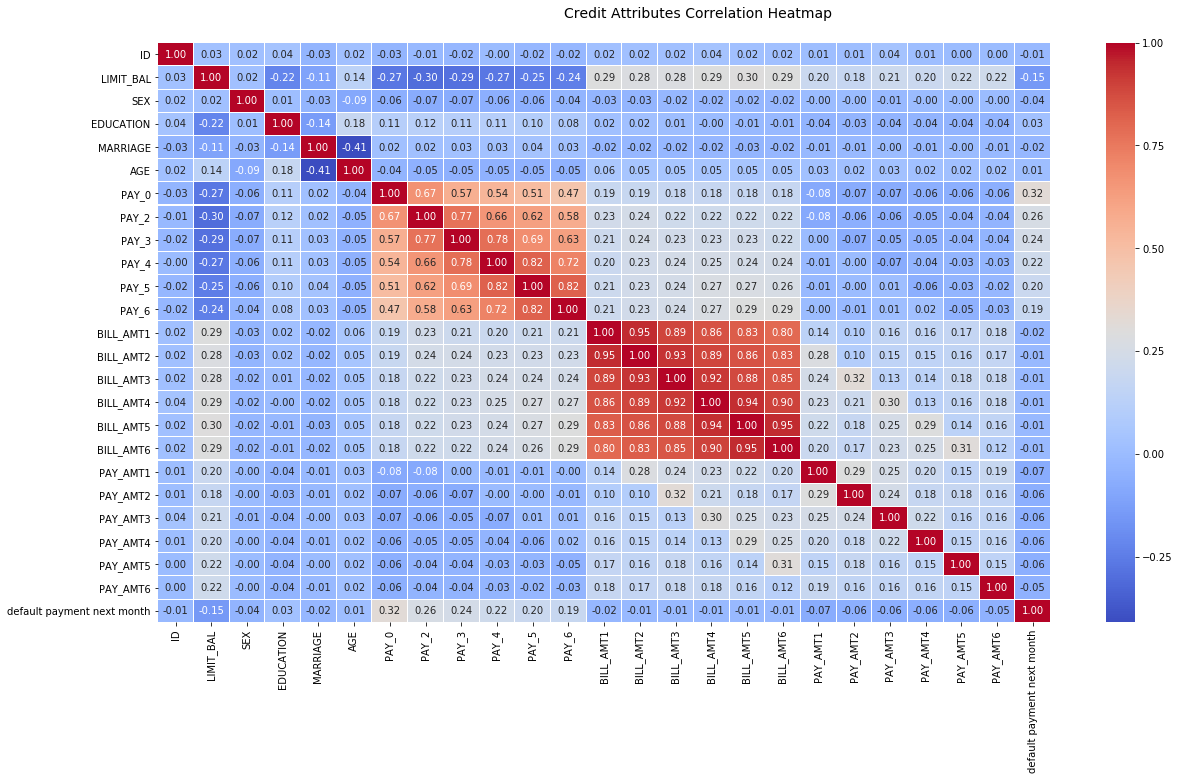

In [21]:
f, ax = plt.subplots(figsize=(20, 10))
hm = sns.heatmap(round(corrMat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Credit Attributes Correlation Heatmap', fontsize=14)

In [22]:
#features
data_features=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
response=['default payment next month']

In [23]:
features = rawData[data_features]
print('Summary of feature sample')
features.head() 

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [24]:
#dependent variable
depVar = rawData[response]

In [25]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [26]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


,default payment next month
0,1
1,1
2,0
3,0
4,0


In [27]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29900  29901      20000    1          2         2   29      0      0     -2   
29901  29902      50000    1          2         2   29      1      2      0   
29902  29903     170000    1          3         2   30      0     -1      0   
29903  29904     260000    1          1         1   30     -1      0     -1   
29904  29905      60000    1          3         2   30      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900     -2  ...          0          0          0          0         0   
29901      0  ...     103486      50590      50248      49387         0   
29902      0  ...     168955     161351     126198     124746    168096   
29903     -1  ...      13333         99         99     172104     10018   
29904      0  ...      54126      58732      59306      59728      2600   

       PAY_A

In [28]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


,default payment next month
29900,1
29901,0
29902,0
29903,0
29904,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 24), (250, 24))

In [30]:
ModelNeighbors = KNeighborsClassifier(n_neighbors=10)
ModelNeighbors.fit(X_train,y_train)
print(cross_val_score(ModelNeighbors, X_train, y_train)) 
ModelNeighbors.score(X_train,y_train)

[0.78486056 0.776      0.78313253]


C:\Users\Siva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

0.7893333333333333

In [31]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(cross_val_score(logreg, X_train, y_train)) 
logreg.score(X_train,y_train)

[0.78087649 0.788      0.77911647]


C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

0.7866666666666666

In [32]:
ModelRFC = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
ModelRFC.fit(X_train,y_train)
print(cross_val_score(ModelRFC, X_train, y_train)) 
ModelRFC.score(X_train,y_train)

[0.79282869 0.792      0.79919679]


C:\Users\Siva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

0.8546666666666667

In [33]:
ModelSVC = SVC(gamma='auto')
ModelSVC.fit(X_train,y_train) 

C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
#Make Predictions - Nearest Nieghbors
predictions_Neighbors = ModelNeighbors.predict(X_test)
predRsquared_Neighbors = r2_score(y_test,predictions_Neighbors)
rmse_Neighbors = sqrt(mean_squared_error(y_test, predictions_Neighbors))
print('R Squared: %.3f' % predRsquared_Neighbors)
print('RMSE: %.3f' % rmse_Neighbors)
print('Accuracy Score of KNN Neighbors', accuracy_score(y_test, predictions_Neighbors))

R Squared: -0.269
RMSE: 0.460
Accuracy Score of KNN Neighbors 0.788


In [36]:
##Make Predictions - LogisticRegression
predictions_logreg = logreg.predict(X_test)
predRsquared_logreg = r2_score(y_test,predictions_logreg)
rmse_logreg = sqrt(mean_squared_error(y_test, predictions_logreg))
print('R Squared: %.3f' % predRsquared_logreg)
print('RMSE: %.3f' % rmse_logreg)
print('Accuracy Score of Logistic Regression', accuracy_score(y_test, predictions_logreg)) 

R Squared: -0.269
RMSE: 0.460
Accuracy Score of Logistic Regression 0.788


In [37]:
#Make Predictions - Random Forest
predictions_RF = ModelRFC.predict(X_test)
predRsquared_RF = r2_score(y_test,predictions_RF)
rmse_RF = sqrt(mean_squared_error(y_test, predictions_RF))
print('R Squared: %.3f' % predRsquared_RF)
print('RMSE: %.3f' % rmse_RF)
print('Accuracy Score of Random Forest', accuracy_score(y_test, predictions_RF)) 

R Squared: -0.365
RMSE: 0.477
Accuracy Score of Random Forest 0.772


In [38]:
#Make Predictions - SVC
predictions_SVC = ModelSVC.predict(X_test)
predRsquared_SVC = r2_score(y_test,predictions_SVC)
rmse_SVC = sqrt(mean_squared_error(y_test, predictions_SVC))
print('R Squared: %.3f' % predRsquared_SVC)
print('RMSE: %.3f' % rmse_SVC)
print('Accuracy Score of SVC', accuracy_score(y_test, predictions_SVC))

R Squared: -0.269
RMSE: 0.460
Accuracy Score of SVC 0.788


In [39]:
print("=== Confusion Matrix Random Forest ===")
print(confusion_matrix(y_test, predictions_RF))
print('\n')

=== Confusion Matrix Random Forest ===
[[185  12]
 [ 45   8]]




In [40]:
print("=== Classification Report  Random Forest ===")
print(classification_report(y_test, predictions_RF))
print('\n')

=== Classification Report  Random Forest ===
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       197
           1       0.40      0.15      0.22        53

    accuracy                           0.77       250
   macro avg       0.60      0.55      0.54       250
weighted avg       0.72      0.77      0.73       250





In [41]:
#important features
RFfeature_imp = pd.Series(ModelRFC.feature_importances_,index=features.columns).sort_values(ascending=False)
RFfeature_imp

PAY_0        0.155390
PAY_2        0.114807
BILL_AMT6    0.060654
BILL_AMT4    0.058038
PAY_AMT5     0.057096
ID           0.055982
AGE          0.044774
PAY_5        0.044352
PAY_AMT3     0.044159
BILL_AMT1    0.042725
PAY_AMT4     0.039311
PAY_AMT2     0.039234
PAY_AMT1     0.039196
BILL_AMT2    0.038830
LIMIT_BAL    0.035435
BILL_AMT3    0.033572
PAY_4        0.032589
PAY_AMT6     0.022848
PAY_3        0.019451
BILL_AMT5    0.009523
PAY_6        0.005204
EDUCATION    0.003072
SEX          0.002388
MARRIAGE     0.001370
dtype: float64

No handles with labels found to put in legend.


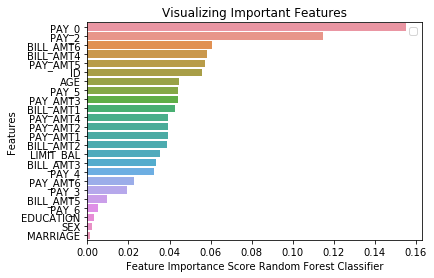

In [42]:
# Creating a bar plot
sns.barplot(x=RFfeature_imp, y=RFfeature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score Random Forest Classifier')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [43]:
print("=== Confusion Matrix Nearest Neighbors ===")
print(confusion_matrix(y_test, predictions_Neighbors))
print('\n')

print("=== Classification Report Nearest Neighbors ===")
print(classification_report(y_test, predictions_Neighbors))
print('\n')

=== Confusion Matrix Nearest Neighbors ===
[[196   1]
 [ 52   1]]


=== Classification Report Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       197
           1       0.50      0.02      0.04        53

    accuracy                           0.79       250
   macro avg       0.65      0.51      0.46       250
weighted avg       0.73      0.79      0.70       250





In [44]:
print("=== Confusion Matrix SVC ===")
print(confusion_matrix(y_test, predictions_SVC))
print('\n')

print("=== Classification Report SVC ===")
print(classification_report(y_test, predictions_SVC))
print('\n')

=== Confusion Matrix SVC ===
[[197   0]
 [ 53   0]]


=== Classification Report SVC ===
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       197
           1       0.00      0.00      0.00        53

    accuracy                           0.79       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.62      0.79      0.69       250





C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


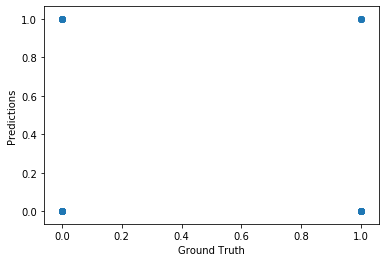

In [45]:
t = np.arange(100)
plt.scatter(y_test, predictions_RF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();